##### We will use the songs data set here to first reduce the number of features to 2 using PCA, and then create a dendrogram using the 2 principal components.

In [28]:
import pandas as pd
songs = pd.read_csv("songs.csv")

In [29]:
songs.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.244,0.982,8,-5.079,0.109,0.000005,0.905,0.0638,0.1960,189.746,death-metal
1,0.368,0.995,6,-4.894,0.183,0.000013,0.849,0.1590,0.1430,98.040,death-metal
2,0.227,0.981,6,-5.343,0.145,0.000006,0.840,0.0581,0.1240,115.207,death-metal
3,0.265,0.993,8,-4.949,0.173,0.000008,0.901,0.1300,0.0857,100.688,death-metal
4,0.348,0.998,2,-5.299,0.208,0.000006,0.897,0.1610,0.0391,109.997,death-metal


##### We will extract the song features so we can transform them

In [23]:
features = songs.iloc[:,0:10]
features

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.244,0.982,8,-5.079,0.1090,0.000005,0.9050,0.0638,0.1960,189.746
1,0.368,0.995,6,-4.894,0.1830,0.000013,0.8490,0.1590,0.1430,98.040
2,0.227,0.981,6,-5.343,0.1450,0.000006,0.8400,0.0581,0.1240,115.207
3,0.265,0.993,8,-4.949,0.1730,0.000008,0.9010,0.1300,0.0857,100.688
4,0.348,0.998,2,-5.299,0.2080,0.000006,0.8970,0.1610,0.0391,109.997
...,...,...,...,...,...,...,...,...,...,...
395,0.294,0.139,4,-18.174,0.0365,0.982000,0.8660,0.1200,0.1110,140.295
396,0.301,0.263,2,-13.932,0.0364,0.946000,0.0832,0.2060,0.1890,46.535
397,0.225,0.133,4,-17.643,0.0398,0.958000,0.8830,0.0986,0.1470,72.287
398,0.335,0.224,2,-14.953,0.0309,0.981000,0.8980,0.1110,0.4610,79.361


##### For PCA, a preprocessing step is to standardize and normalize each feature so they are all on the same scale, and their means are 0

In [30]:
from sklearn.preprocessing import StandardScaler
features = StandardScaler().fit_transform(features) # initialize function, then fit and transform features into scaled features
from sklearn.preprocessing import Normalizer
features = Normalizer().fit_transform(features)
features


array([[-0.3873025 ,  0.27330775,  0.24861631, ..., -0.22605271,
        -0.20491914,  0.62786239],
       [-0.27511971,  0.43714588,  0.13413734, ..., -0.13772004,
        -0.38835179, -0.2688211 ],
       [-0.53494609,  0.36697981,  0.1190957 , ..., -0.31473974,
        -0.37461815, -0.03864785],
       ...,
       [-0.36090599, -0.42864846, -0.05590877, ..., -0.14899989,
        -0.22711302, -0.34891262],
       [-0.24298853, -0.40973404, -0.22137437, ..., -0.15682742,
         0.10598065, -0.34208975],
       [-0.21339752, -0.41418346,  0.01256772, ..., -0.15741897,
        -0.2174345 , -0.35161267]])

##### Now we can apply PCA on the features to reduce it from 10 dimensions to 2 dimensions

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)


##### We will attach the 2 principal components back to our songs data frame, and extract them out in variable X.

In [32]:
songs['PC1'] = principalComponents[:,0]
songs['PC2'] = principalComponents[:,1]
X = songs[['PC1','PC2']]
X

,PC1,PC2
0,0.141418,0.588788
1,-0.014361,0.777241
2,0.166529,0.738599
3,0.134954,0.788508
4,0.062822,0.768515
...,...,...
395,0.999440,-0.111410
396,0.644001,-0.270022
397,0.959892,-0.119157
398,0.840547,-0.339141


##### We will use the dendrogram and linkage functions from the sciPy library. And the plotting mechanism from the matplotlib library.

In [33]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

##### Next, we will first define our linkage mechanism first. We will use Ward linkage, that uses the distance between centroids of clusters to fill the proximity matrix. 

##### We will also define a dendrogram and use the matplotlib library to display it

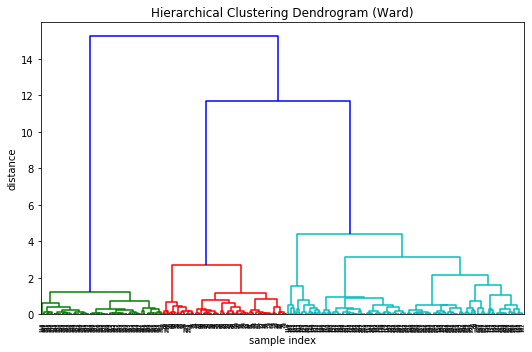

In [35]:

linkage_matrix = linkage(X, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

##### The dendrogram function optimally picks the number of clusters there should be in the data. In the above example, we get 3 different clusters, based on the different colors.

##### We can also specify our own cutoff for the distance value. Using the color_threshold parameter, I can specify the cutoff distance to be 3.

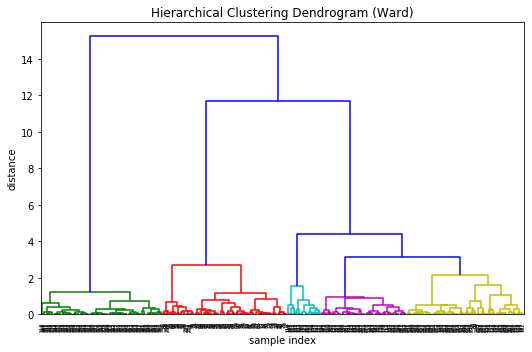

In [36]:

linkage_matrix = linkage(X, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold = 3,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

##### So now instead of 3, I get 5 different clusters at distance cutoff of 3.


##### Now we can use agglomerative hierarchical clustering to cluster our data into 3 clusters.

In [37]:
from sklearn.cluster import AgglomerativeClustering

##### We will specify Ward linkage again, and number of clusters to be 3.

In [16]:
clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
clustering.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

##### The cluster labels are stored in clustering.labels_ so I will use them to make a new attribute in the songs data frame

In [38]:
songs['labels'] = clustering.labels_

##### We can also see how many data points there are in each cluster. Looks like cluster 0 has swallowed hip hop and electronic genres

In [40]:
songs.groupby(['labels']).size()

labels
0    191
1    101
2    108
dtype: int64

##### We will then plot the 2 principal components with points colored by our generated cluster labels

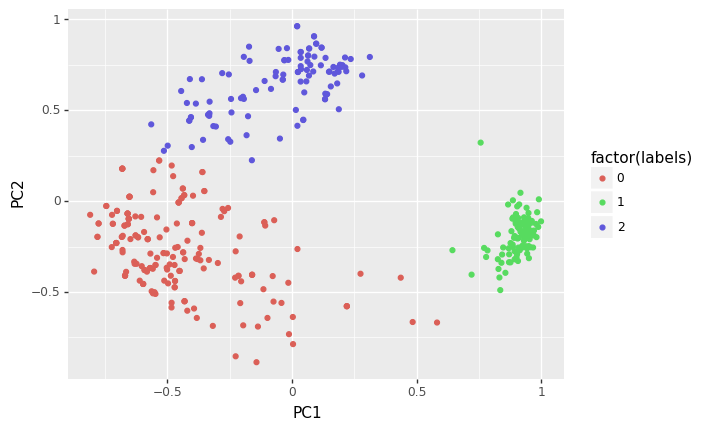

<ggplot: (143415875129)>

In [41]:
from plotnine import *
ggplot(songs,aes(x="PC1",y="PC2",colour="factor(labels)"))+geom_point()

##### Compare that to the actual genres

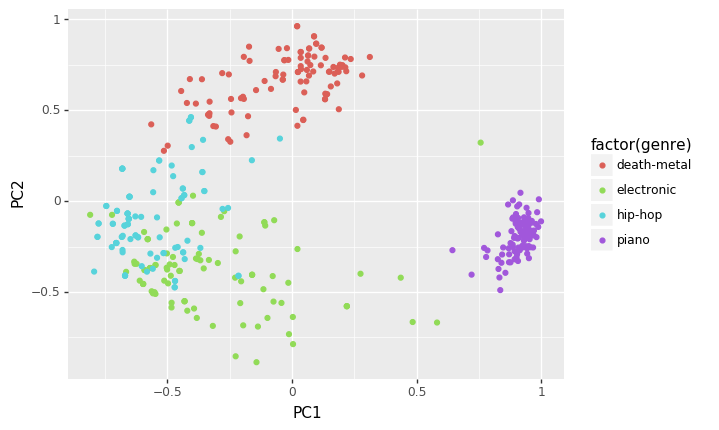

<ggplot: (-9223371893438984595)>

In [42]:
from plotnine import *
ggplot(songs,aes(x="PC1",y="PC2",colour="factor(genre)"))+geom_point()